In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('./data/ArM/ArM screening 5 positions complete data set.xlsx')

In [3]:
df.nunique()

type                   4
variant             2085
norm_TSNAK          3072
norm_TFNAQ          3072
OD                  1885
indole               797
plate                 32
sequencing_reads     207
dtype: int64

In [4]:
# df.columns
# Index(['type', 'variant', 'norm_TSNAK', 'norm_TFNAQ', 'OD', 'indole', 'plate',
#        'sequencing_reads'],
#       dtype='object')

In [5]:
df[df['variant'] == 'TFNAQ']

# df_esm = pd.read_parquet("./data/streptavidin-esm2-karim.parquet")
# def get_variant_from_params(param: str):
#     return "".join([x[-1] for x in param.split("+")])
# df_esm["variant"] = df_esm["params"].apply(get_variant_from_params)
# # drop where no + in params
# df_esm = df_esm[df_esm["params"].str.contains("\+")]

# # merge the two dataframes
# # df = df.merge(df_esm, left_on="variant", right_on="variant", how="inner")
# df

# if isinstance(df['embedding-mean'][0], str):
#     df['embedding-mean'] = df['embedding-mean'].apply(eval)
# X = np.array(df['embedding-mean'].tolist())

# import umap
# reducer = umap.UMAP()
# X_embedded = reducer.fit_transform(X)

# df['umap-1'] = X_embedded[:, 0]
# df['umap-2'] = X_embedded[:, 1]

,type,variant,norm_TSNAK,norm_TFNAQ,OD,indole,plate,sequencing_reads
11,control_TFNAQ,TFNAQ,7.657201,0.887791,0.2215,0.1314,8218,4.0
15,control_TFNAQ,TFNAQ,5.762989,0.668173,0.2916,0.0744,8222,3.0
393,control_TFNAQ,TFNAQ,9.334231,1.082230,0.2357,0.1316,8216,11.0
898,mutant,TFNAQ,8.397679,0.973644,0.2205,0.1069,8175,155.0
931,mutant,TFNAQ,3.333168,0.386454,0.1223,0.0292,8176,52.0
1095,mutant,TFNAQ,0.485399,0.056278,0.5010,0.0179,8180,14.0
2509,mutant,TFNAQ,8.681358,1.006534,0.1828,0.0928,8220,101.0


In [6]:
# df_numeric = df[['norm_TSNAK', 'norm_TFNAQ', 'OD', 'indole', 'sequencing_reads', 'plate']]
df_numeric = df
df_numeric = df_numeric.dropna()

# only keep upto 95% quantile
# print(len(df_numeric))
# df_numeric = df_numeric[(df_numeric['OD'] > 0.0185)]
# print(len(df_numeric))
# df_numeric = df_numeric[df_numeric['norm_TSNAK'] < 20]
# print(len(df_numeric))
# # df_numeric = df_numeric[(df_numeric['sequencing_reads'] > 5) & (df_numeric['sequencing_reads'] < 100)] 
# df_numeric = df_numeric[(df_numeric['sequencing_reads'] > 5)]
# print(len(df_numeric))
df_numeric["invOD"] = 1 / df_numeric['OD']

# df_numeric = df_numeric[(df_numeric['OD'] > 0.0185)]
# df_numeric = df_numeric[df_numeric['norm_TSNAK'] < 20]
# df_numeric = df_numeric[(df_numeric['sequencing_reads'] > 5)]

bools = (df_numeric['OD'] > 0.0185) #& \
        # (df_numeric['norm_TSNAK'] < 20) & \
        # (df_numeric['sequencing_reads'] > 5)
        
# df_numeric = df_numeric[bools]
df_numeric["big_OD"] = bools

group_mean_norm_TSNAK = df_numeric.groupby('plate')["norm_TSNAK"].transform("mean")

df_numeric['norm_TSNAK_normed'] = df_numeric['norm_TSNAK'] / group_mean_norm_TSNAK

df_numeric.describe()

C:\Users\queim\AppData\Local\Temp\ipykernel_25144\1545618239.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric["invOD"] = 1 / df_numeric['OD']
C:\Users\queim\AppData\Local\Temp\ipykernel_25144\1545618239.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric["big_OD"] = bools
C:\Users\queim\AppData\Local\Temp\ipykernel_25144\1545618239.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

,norm_TSNAK,norm_TFNAQ,OD,indole,plate,sequencing_reads,invOD,norm_TSNAK_normed
count,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000
mean,6.241284,0.723627,0.178802,0.037572,8243.425101,113.642825,12.842047,1.000000
std,48.327428,5.603180,0.096925,0.020613,50.615453,37.403091,80.144178,2.093215
min,0.126114,0.014622,0.000300,0.003200,8173.000000,3.000000,1.312336,0.008116
25%,1.706845,0.197895,0.108600,0.024500,8180.000000,95.000000,4.351611,0.376563
50%,2.692689,0.312196,0.154900,0.032600,8272.000000,116.000000,6.455778,0.689484
75%,4.265922,0.494600,0.229800,0.044950,8279.000000,137.500000,9.208103,1.139158
max,1867.421139,216.512596,0.762000,0.179600,8310.000000,258.000000,3333.308167,49.293369


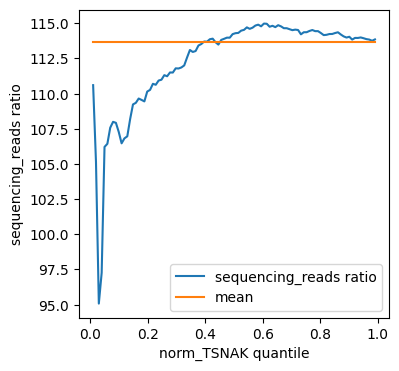

In [7]:
# df = df_numeric
meta_data = "sequencing_reads"
prop = "norm_TSNAK"
quant = lambda q: df[df[prop] < df[prop].quantile(q)][meta_data].mean()

#plot border ratio for different quantiles of OD
fig = plt.figure(figsize=(4, 4))
qs = np.linspace(0.01, 0.99, 100)
border_ratios = [quant(q) for q in qs]
plt.plot(qs, border_ratios)
#constant border ratio
plt.plot(qs, [df[meta_data].mean()] * len(qs))
plt.xlabel(f'{prop} quantile')
plt.ylabel(f'{meta_data} ratio')
plt.legend([f'{meta_data} ratio', 'mean'])

In [11]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "browser"
df_numeric['plate'] = df_numeric['plate'].astype("category")

color = "big_OD"
fig = px.scatter_matrix(df_numeric,
    dimensions=['norm_TSNAK', "invOD", "OD", 'indole', 'sequencing_reads'],
    # color="big_OD",
    color=color,
    hover_data=['variant'],
    title="Scatter matrix of ArM screening data",
)

fig.update_layout(
    hoversubplots="axis",
    width=1000,
    height=1000,
    hovermode="x",
)
#show in browser
fig.write_html(f"seq_reads_scatter_matrix_{color}.html")

C:\Users\queim\AppData\Local\Temp\ipykernel_25144\3954431262.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [9]:
# import pygwalker as pyg

# pyg.walk(df_numeric)

In [10]:

print(df_numeric.describe())
print(df_numeric.nunique())
# colormap tab10
# sns.pairplot(df_numeric, hue="plate", palette='tab10')



        norm_TSNAK   norm_TFNAQ           OD       indole  sequencing_reads  \
count  2223.000000  2223.000000  2223.000000  2223.000000       2223.000000   
mean      6.241284     0.723627     0.178802     0.037572        113.642825   
std      48.327428     5.603180     0.096925     0.020613         37.403091   
min       0.126114     0.014622     0.000300     0.003200          3.000000   
25%       1.706845     0.197895     0.108600     0.024500         95.000000   
50%       2.692689     0.312196     0.154900     0.032600        116.000000   
75%       4.265922     0.494600     0.229800     0.044950        137.500000   
max    1867.421139   216.512596     0.762000     0.179600        258.000000   

             invOD  norm_TSNAK_normed  
count  2223.000000        2223.000000  
mean     12.842047           1.000000  
std      80.144178           2.093215  
min       1.312336           0.008116  
25%       4.351611           0.376563  
50%       6.455778           0.689484  
75%     